<a href="https://colab.research.google.com/github/ThomasDarrieumerlou/Forecasting-project/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [164]:
atlanta_data = pd.read_excel('Atlanta.xlsx')
#atlanta_data = df[df['City, State'] == 'Atlanta, GA']

# Afficher les données liées à Atlanta
atlanta_data

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975,41.080000,"Atlanta, GA",490584,8033,185,443,3518,3887
1,1976,40.742500,"Atlanta, GA",457300,7529,154,477,3518,3380
2,1977,42.482500,"Atlanta, GA",440300,7595,138,510,3593,3354
3,1978,45.897500,"Atlanta, GA",456000,8845,144,592,3990,4119
4,1979,50.840000,"Atlanta, GA",423103,10715,231,656,4639,5189
5,1980,56.942500,"Atlanta, GA",422474,11075,201,671,5470,4733
6,1981,61.112500,"Atlanta, GA",435626,10608,181,644,5246,4537
7,1982,64.932500,"Atlanta, GA",441103,10486,152,613,5722,3999
8,1983,67.547500,"Atlanta, GA",448635,9326,141,619,5014,3552
9,1984,71.657500,"Atlanta, GA",442951,10525,135,632,5729,4029


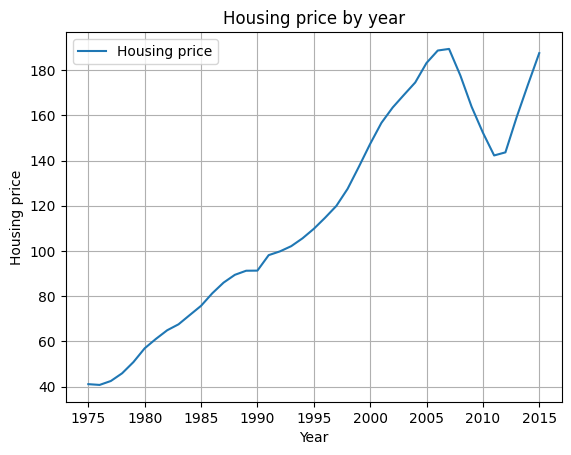

In [121]:
atlanta_data.plot(x='Year', y='index_nsa', label='Housing price')

plt.title('Housing price by year')
plt.xlabel('Year')
plt.ylabel('Housing price')
plt.legend()
plt.grid()
plt.show()

In [122]:
ad_fuller_result = adfuller(atlanta_data['index_nsa'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.575933257874712
p-value: 0.9977835468996378


In [123]:
index_diff = np.diff(atlanta_data['index_nsa'], n=1)

ad_fuller_result = adfuller(index_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.5958732220236365
p-value: 0.00584041476850811


In [124]:
index_diff2 = np.diff(index_diff, n=1)

ad_fuller_result = adfuller(index_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.2651968960700914
p-value: 0.0005100643153057467


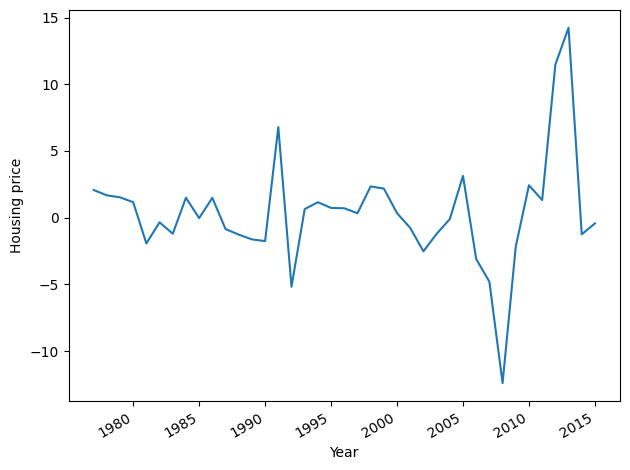

In [125]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')

fig.autofmt_xdate()
plt.tight_layout()

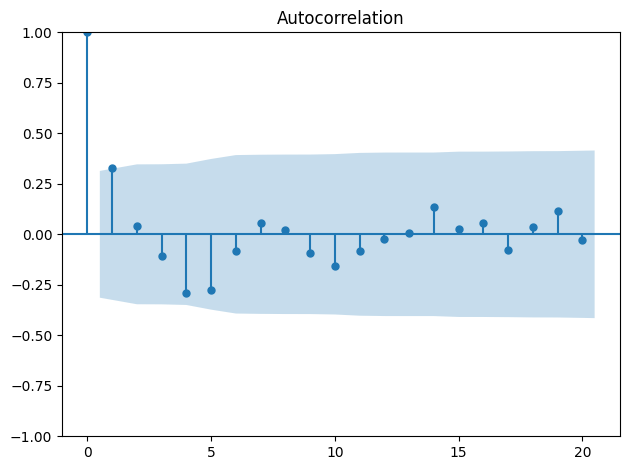

In [126]:
plot_acf(index_diff2, lags=20);
plt.tight_layout()

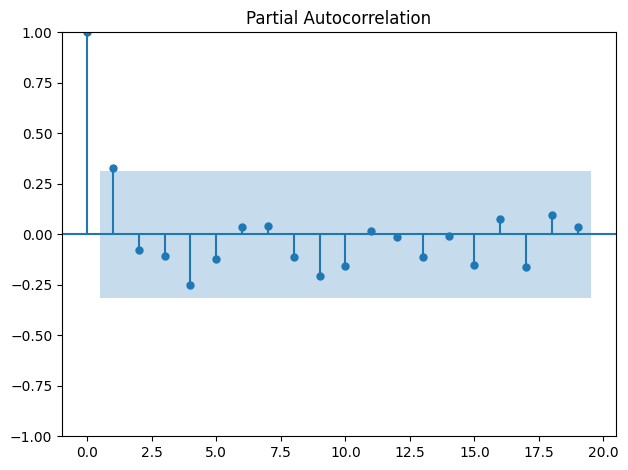

In [127]:
plot_pacf(index_diff2, lags=19);
plt.tight_layout()

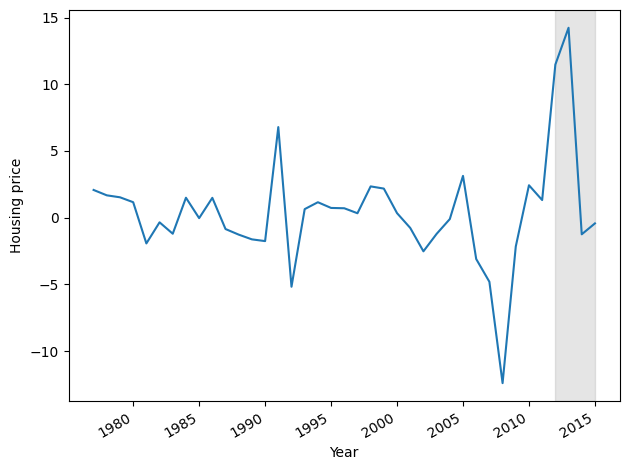

In [128]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')
ax.axvspan(2012, 2015, color='#808080', alpha=0.2)


fig.autofmt_xdate()
plt.tight_layout()

In [129]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [207]:
ps = range(0, 5, 1)
qs = range(0, 5, 1)
d = 2

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [208]:
train = atlanta_data['index_nsa'][:-5]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/25 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(0, 0)",175.809745,177.336105
1,"(1, 0)",176.704777,179.757498
2,"(0, 1)",176.779354,179.832075
3,"(3, 0)",178.205425,184.310868
4,"(0, 2)",178.405774,182.984856
5,"(0, 3)",178.614885,184.720327
6,"(2, 0)",178.700280,183.279362
7,"(1, 1)",178.703380,183.282461
8,"(1, 3)",179.198002,186.829805
9,"(0, 4)",179.869441,187.501243


In [209]:
model = SARIMAX(train, order=(0,2,0), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              index_nsa   No. Observations:                   36
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -86.905
Date:                Wed, 27 Mar 2024   AIC                            175.810
Time:                        22:58:21   BIC                            177.336
Sample:                             0   HQIC                           176.330
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.7198      1.212      8.021      0.000       7.345      12.095
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                48.94
Prob(Q):                              0.32   Pr

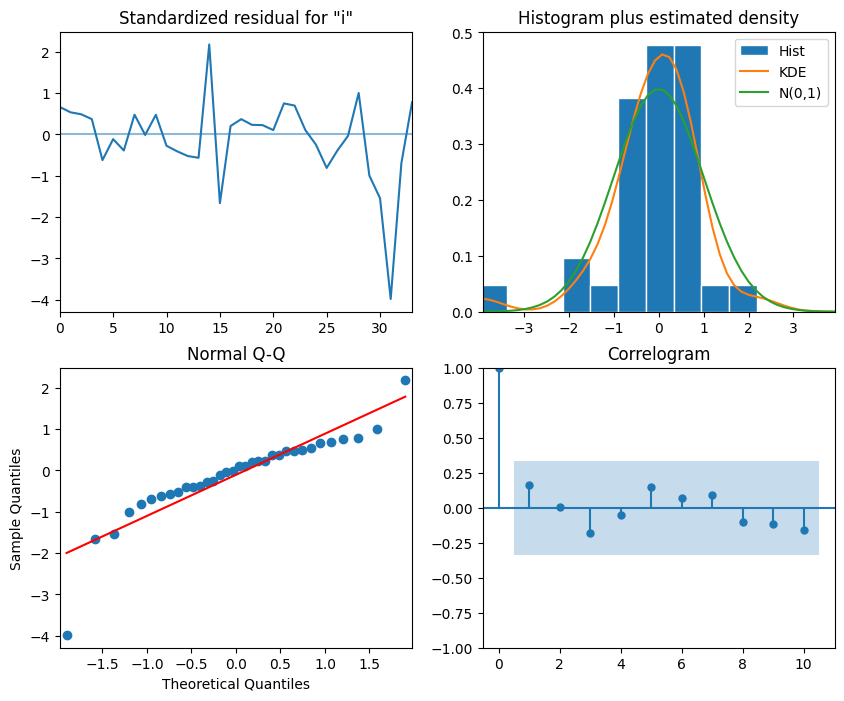

In [210]:
model_fit.plot_diagnostics(figsize=(10,8));

In [211]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,4.516163,0.033576
2,4.540775,0.103272
3,4.543756,0.208420
4,4.547299,0.336976
5,4.680662,0.456081
6,4.699270,0.582921
7,4.711413,0.695132
8,4.820227,0.776606
9,4.824203,0.849356
10,4.891020,0.898338


In [212]:
test = atlanta_data.iloc[-4:]

test['naive_seasonal'] = atlanta_data['index_nsa'].iloc[36:40].values
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal
37,2012,143.613125,"Atlanta, GA",437041,6027,83,113,3555,2276,142.248125
38,2013,159.219375,"Atlanta, GA",451020,5516,83,105,2965,2363,143.613125
39,2014,173.577500,"Atlanta, GA",454363,5577,93,151,3004,2329,159.219375
40,2015,187.505000,"Atlanta, GA",464710,5203,94,170,2944,1995,173.577500


In [213]:
ARIMA_pred = model_fit.get_prediction(36, 40).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal,ARIMA_pred
37,2012,143.613125,"Atlanta, GA",437041,6027,83,113,3555,2276,142.248125,129.49125
38,2013,159.219375,"Atlanta, GA",451020,5516,83,105,2965,2363,143.613125,118.05500
39,2014,173.577500,"Atlanta, GA",454363,5577,93,151,3004,2329,159.219375,106.61875
40,2015,187.505000,"Atlanta, GA",464710,5203,94,170,2944,1995,173.577500,95.18250


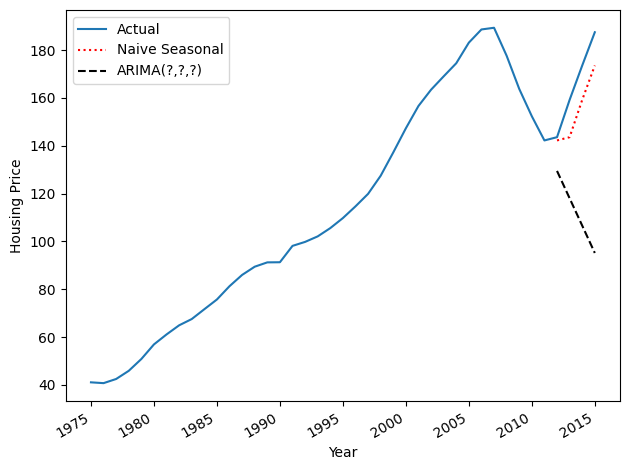

In [214]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'], atlanta_data['index_nsa'], label='Actual')
ax.plot(test['Year'], test['naive_seasonal'], 'r:', label='Naive Seasonal')
ax.plot(test['Year'], test['ARIMA_pred'], 'k--', label='ARIMA(?,?,?)')

ax.set_xlabel('Year')
ax.set_ylabel('Housing Price')

ax.legend(loc='upper left')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()



In [196]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['index_nsa'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['index_nsa'], test['ARIMA_pred'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')

MAPE Naive: 6.61 %
MAPE ARIMA: 22.63 %


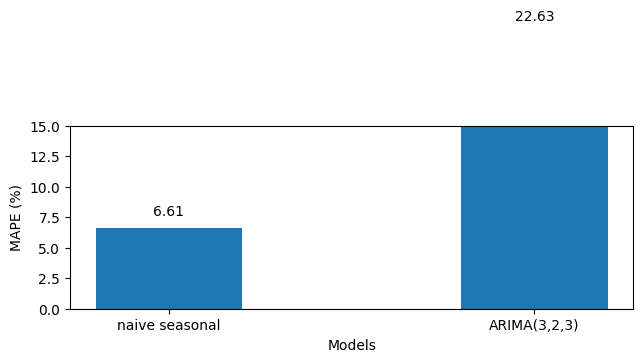

In [197]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(3,2,3)']
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()